In [21]:
import pandas as pd
import numpy as np
from sqlalchemy import create_engine
import psycopg2
import time

In [22]:
from pathlib import Path
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [23]:
merged = pd.read_csv('Resources/merged_df.csv')
merged.head(20)

,id,host_listings_count,host_is_superhost,host_identity_verified,neighbourhood_cleansed,room_type,property_type,accommodates,bathrooms,bedrooms,...,sun_loungers,electric_profiling_bed,hammock,mobile_hoist,Kitchen_Grouped_Binary,Bathroom_Grouped_Binary,Laundry_Grouped_Binary,day,month,price
0,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,1,40.0
1,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,2,40.0
2,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,3,40.0
3,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,4,40.0
4,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,5,40.0
5,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,6,40.0
6,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,7,40.0
7,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,8,40.0
8,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,9,40.0
9,6422,1,t,t,District 6,Private room,House,2,1.0,2,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,weekday,10,40.0


In [24]:
# Create a list of the object type columns.
objects = merged.dtypes[merged.dtypes == 'object'].index.tolist()
objects

['host_is_superhost',
 'host_identity_verified',
 'neighbourhood_cleansed',
 'room_type',
 'property_type',
 'bed_type',
 'instant_bookable',
 'is_business_travel_ready',
 'cancellation_policy',
 'require_guest_profile_picture',
 'require_guest_phone_verification',
 'has_availability',
 'day']

In [25]:
# Create a OneHotEncoder instance
from sklearn.preprocessing import OneHotEncoder
enc = OneHotEncoder(sparse=False, drop='if_binary')

# Fit and transform the OneHotEncoder using the categorical variable list
encode_df = pd.DataFrame(enc.fit_transform(merged[objects]))

# Add the encoded variable names to the dataframe
encode_df.columns = enc.get_feature_names(objects)
encode_df.head(5)

,host_is_superhost_t,host_identity_verified_t,neighbourhood_cleansed_District 1,neighbourhood_cleansed_District 10,neighbourhood_cleansed_District 11,neighbourhood_cleansed_District 12,neighbourhood_cleansed_District 13,neighbourhood_cleansed_District 14,neighbourhood_cleansed_District 15,neighbourhood_cleansed_District 16,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,require_guest_phone_verification_t,has_availability_t,day_weekend
0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
1,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
2,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
4,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [26]:
# Merge one-hot encoded features and drop the originals
merged = merged.merge(encode_df,left_index=True, right_index=True)
merged = merged.drop(columns=objects)

In [27]:
from sklearn.model_selection import GroupShuffleSplit
train_inds, test_inds = next(GroupShuffleSplit(test_size=.20, n_splits=2, random_state = 78).split(merged, groups=merged['id']))

train = merged.iloc[train_inds]
test = merged.iloc[test_inds]

In [28]:
train.head(50)

,id,host_listings_count,accommodates,bathrooms,bedrooms,security_deposit,cleaning_fee,review_scores_rating,number_of_reviews,days_host,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,require_guest_phone_verification_t,has_availability_t,day_weekend
24,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
25,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
26,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
27,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
28,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
29,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
30,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
31,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
32,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
33,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [29]:
# Define the target variable.
y_train=train['price']
y_test=test['price']

In [30]:
# Define the features.
X_train = train.drop(columns ='price')
X_test = test.drop(columns ='price')

In [31]:
X_train.head(50)

,id,host_listings_count,accommodates,bathrooms,bedrooms,security_deposit,cleaning_fee,review_scores_rating,number_of_reviews,days_host,...,cancellation_policy_flexible,cancellation_policy_moderate,cancellation_policy_strict,cancellation_policy_strict_14_with_grace_period,cancellation_policy_super_strict_30,cancellation_policy_super_strict_60,require_guest_profile_picture_t,require_guest_phone_verification_t,has_availability_t,day_weekend
24,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
25,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
26,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
27,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
28,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
29,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
30,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
31,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
32,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0
33,20847,2,2,1.0,1,0.0,25.0,94.0,138,3265,...,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0


In [32]:
# import the regressor 
from sklearn.ensemble import RandomForestRegressor

#Instantiate the Decision Tree Regression model:
random_forest_regression_model = RandomForestRegressor(n_estimators = 100, random_state = 78) 
random_forest_regression_model.fit(X_train, y_train)

RandomForestRegressor(random_state=78)

In [33]:
# Calculate the r-squared score of the initial model.
R_squared_training_set = random_forest_regression_model.score(X_train, y_train, sample_weight=None)
print(f"R-Squared Training Set:  {R_squared_training_set}")

R_squared_testing_set = random_forest_regression_model.score(X_test, y_test, sample_weight=None)
print(f"R-Squared Testing Set:  {R_squared_testing_set}")

R-Squared Training Set:  0.9957664653373347
R-Squared Testing Set:  0.5862828172335339


In [34]:
# Calculate the predicted prices for scaled_X using the model.
y_pred = random_forest_regression_model.predict(X_test)
output = pd.DataFrame({"Prediction":y_pred,"Actual":y_test})
print(output)

        Prediction  Actual
0        64.811215    40.0
1        63.995777    40.0
2        64.823536    40.0
3        65.442175    40.0
4        66.438528    40.0
...            ...     ...
143875  704.922583   665.0
143876  718.093250   665.0
143877  703.104250   665.0
143878  706.724250   672.0
143879  693.606250   665.0

[28800 rows x 2 columns]


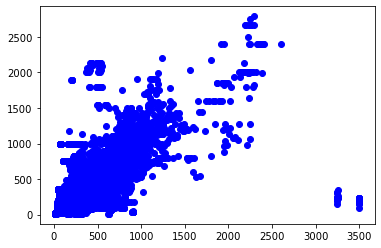

In [35]:
plt.scatter(y_pred, y_test, color='blue')

In [36]:
#Calculate the mean squared error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
rmse = np.sqrt(mse)
print(f"Mean Error: {rmse}")

Mean Squared Error: 27762.428485289132
Mean Error: 166.62061242622156


In [37]:
# Calculate evaluation metrics

# Calculate the absolute errors
errors = abs(y_pred - y_test)

# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), '$')

# Median absolute Error too doesn't weight the outliers as much    

Mean Absolute Error: 73.52 $


In [38]:
# Measuring feature importance using permutation via rfpimp library
from sklearn.metrics import r2_score
from sklearn.inspection import permutation_importance

r = permutation_importance(random_forest_regression_model, X_test, y_test, random_state = 78, n_jobs=30)

In [ ]:
sorted_idx = r.importances_mean.argsort()

fig, ax = plt.subplots(figsize=(18,40))
ax.boxplot(r.importances[sorted_idx].T,
           vert=False, labels=X_test.columns[sorted_idx])
ax.set_title("Permutation Importances (test set)")
fig.tight_layout()
plt.show()